In [4]:
#Imports
%matplotlib inline

#Imports
import pynbody
from matplotlib.pylab import *
import matplotlib.pylab as plt
import pynbody.plot.sph as sph
import numpy as np
from scipy import interpolate
import matplotlib.lines as mlines
import matplotlib.colors
from matplotlib.pyplot import figure, show, rc

#Tell notebook where my diskpy distribution is (the lazy way)
import os
sys.path.append('/astro/users/dflemin3/Desktop/diskpy')
sys.path.append('/astro/users/dflemin3/Desktop')

import diskpy
from diskpy.ICgen import *

#Typical plot parameters that make for pretty plots
plt.rcParams['figure.figsize'] = (10,6)
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=20, usetex=True)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 20.0

# Plot surface density vs. radius at the end of the long simulations with the usual parameters [see .param file] for low, and control simulations corresponding to $e_{initial}$ = ~0 and 0.1032, respectively.

In [32]:
r_control_long = [ 0.24067508,  0.25220526,  0.26373544,  0.27526562,  0.2867958 ,
        0.29832598,  0.30985616,  0.32138634,  0.33291652,  0.3444467 ,
        0.35597688,  0.36750706,  0.37903724,  0.39056742,  0.4020976 ,
        0.41362778,  0.42515796,  0.43668814,  0.44821832,  0.4597485 ,
        0.47127868,  0.48280886,  0.49433904,  0.50586922,  0.5173994 ,
        0.52892958,  0.54045976,  0.55198994,  0.56352012,  0.5750503 ,
        0.58658048,  0.59811066,  0.60964084,  0.62117102,  0.6327012 ,
        0.64423138,  0.65576156,  0.66729174,  0.67882192,  0.6903521 ,
        0.70188228,  0.71341246,  0.72494264,  0.73647282,  0.748003  ,
        0.75953318,  0.77106336,  0.78259354,  0.79412372,  0.8056539 ,
        0.81718408,  0.82871426,  0.84024444,  0.85177462,  0.8633048 ,
        0.87483498,  0.88636516,  0.89789534,  0.90942552,  0.9209557 ,
        0.93248588,  0.94401606,  0.95554624,  0.96707642,  0.9786066 ,
        0.99013678,  1.00166696,  1.01319714,  1.02472732,  1.0362575 ,
        1.04778768,  1.05931786,  1.07084804,  1.08237822,  1.0939084 ,
        1.10543858,  1.11696876,  1.12849894,  1.14002912,  1.1515593 ,
        1.16308948,  1.17461966,  1.18614984,  1.19768002,  1.2092102 ,
        1.22074038,  1.23227056,  1.24380074,  1.25533092,  1.2668611 ,
        1.27839128,  1.28992146,  1.30145164,  1.31298182,  1.324512  ,
        1.33604218,  1.34757236,  1.35910254,  1.37063272,  1.3821629 ,
        1.39369308,  1.40522326,  1.41675344,  1.42828362,  1.4398138 ,
        1.45134398,  1.46287416,  1.47440434,  1.48593452,  1.4974647 ,
        1.50899488,  1.52052506,  1.53205524,  1.54358542,  1.5551156 ,
        1.56664578,  1.57817596,  1.58970614,  1.60123632,  1.6127665 ,
        1.62429668,  1.63582686,  1.64735704,  1.65888722,  1.6704174 ,
        1.68194758,  1.69347776,  1.70500794,  1.71653812,  1.7280683 ,
        1.73959848,  1.75112866,  1.76265884,  1.77418902,  1.7857192 ,
        1.79724938,  1.80877956,  1.82030974,  1.83183992,  1.8433701 ,
        1.85490028,  1.86643046,  1.87796064,  1.88949082,  1.901021  ,
        1.91255118,  1.92408136,  1.93561154,  1.94714172,  1.9586719 ,
        1.97020208,  1.98173226,  1.99326244,  2.00479262,  2.0163228 ,
        2.02785298,  2.03938316,  2.05091334,  2.06244352,  2.0739737 ,
        2.08550388,  2.09703406,  2.10856424,  2.12009442,  2.1316246 ,
        2.14315478,  2.15468496,  2.16621514,  2.17774532,  2.1892755 ,
        2.20080568,  2.21233586,  2.22386604,  2.23539622,  2.2469264 ,
        2.25845658,  2.26998676,  2.28151694,  2.29304712,  2.3045773 ,
        2.31610748,  2.32763766,  2.33916784,  2.35069802,  2.3622282 ,
        2.37375838,  2.38528856,  2.39681874,  2.40834892,  2.4198791 ,
        2.43140928,  2.44293946,  2.45446964,  2.46599982,  2.47753   ,
        2.48906018,  2.50059036,  2.51212054,  2.52365072,  2.5351809 ,
        2.54671108,  2.55824126,  2.56977144,  2.58130162,  2.5928318 ,
        2.60436198,  2.61589216,  2.62742234,  2.63895252,  2.6504827 ,
        2.66201288,  2.67354306,  2.68507324,  2.69660342,  2.7081336 ,
        2.71966378,  2.73119396,  2.74272414,  2.75425432,  2.7657845 ,
        2.77731468,  2.78884486,  2.80037504,  2.81190522,  2.8234354 ,
        2.83496558,  2.84649576,  2.85802594,  2.86955612,  2.8810863 ,
        2.89261648,  2.90414666,  2.91567684,  2.92720702,  2.9387372 ,
        2.95026738,  2.96179756,  2.97332774,  2.98485792,  2.9963881 ,
        3.00791828,  3.01944846,  3.03097864,  3.04250882,  3.054039  ,
        3.06556918,  3.07709936,  3.08862954,  3.10015972,  3.1116899 ,
        3.12322008,  3.13475026,  3.14628044,  3.15781062,  3.1693408 ,
        3.18087098,  3.19240116,  3.20393134,  3.21546152,  3.2269917 ,
        3.23852188,  3.25005206,  3.26158224,  3.27311242,  3.2846426 ,
        3.29617278,  3.30770296,  3.31923314,  3.33076332,  3.3422935 ,
        3.35382368,  3.36535386,  3.37688404,  3.38841422,  3.3999444 ,
        3.41147459,  3.42300477,  3.43453495,  3.44606513,  3.45759531,
        3.46912549,  3.48065567,  3.49218585,  3.50371603,  3.51524621,
        3.52677639,  3.53830657,  3.54983675,  3.56136693,  3.57289711,
        3.58442729,  3.59595747,  3.60748765,  3.61901783,  3.63054801,
        3.64207819,  3.65360837,  3.66513855,  3.67666873,  3.68819891,
        3.69972909,  3.71125927,  3.72278945,  3.73431963,  3.74584981,
        3.75737999,  3.76891017,  3.78044035,  3.79197053,  3.80350071,
        3.81503089,  3.82656107,  3.83809125,  3.84962143,  3.86115161,
        3.87268179,  3.88421197,  3.89574215,  3.90727233,  3.91880251,
        3.93033269,  3.94186287,  3.95339305,  3.96492323,  3.97645341,
        3.98798359,  3.99951377,  4.01104395,  4.02257413,  4.03410431,
        4.04563449,  4.05716467,  4.06869485,  4.08022503,  4.09175521,
        4.10328539,  4.11481557,  4.12634575,  4.13787593,  4.14940611,
        4.16093629,  4.17246647,  4.18399665,  4.19552683,  4.20705701,
        4.21858719,  4.23011737,  4.24164755,  4.25317773,  4.26470791,
        4.27623809,  4.28776827,  4.29929845,  4.31082863,  4.32235881,
        4.33388899,  4.34541917,  4.35694935,  4.36847953,  4.38000971,
        4.39153989,  4.40307007,  4.41460025,  4.42613043,  4.43766061,
        4.44919079,  4.46072097,  4.47225115,  4.48378133,  4.49531151,
        4.50684169,  4.51837187,  4.52990205,  4.54143223,  4.55296241,
        4.56449259,  4.57602277,  4.58755295,  4.59908313,  4.61061331,
        4.62214349,  4.63367367,  4.64520385,  4.65673403,  4.66826421,
        4.67979439,  4.69132457,  4.70285475,  4.71438493,  4.72591511,
        4.73744529,  4.74897547,  4.76050565,  4.77203583,  4.78356601,
        4.79509619,  4.80662637,  4.81815655,  4.82968673,  4.84121691,
        4.85274709,  4.86427727,  4.87580745,  4.88733763,  4.89886781,
        4.91039799,  4.92192817,  4.93345835,  4.94498853,  4.95651871,
        4.96804889,  4.97957907,  4.99110925,  5.00263943,  5.01416961,
        5.02569979,  5.03722997,  5.04876015,  5.06029033,  5.07182051,
        5.08335069,  5.09488087,  5.10641105,  5.11794123,  5.12947141,
        5.14100159,  5.15253177,  5.16406195,  5.17559213,  5.18712231,
        5.19865249,  5.21018267,  5.22171285,  5.23324303,  5.24477321,
        5.25630339,  5.26783357,  5.27936375,  5.29089393,  5.30242411,
        5.31395429,  5.32548447,  5.33701465,  5.34854483,  5.36007501,
        5.37160519,  5.38313537,  5.39466555,  5.40619573,  5.41772591,
        5.42925609,  5.44078627,  5.45231645,  5.46384663,  5.47537681,
        5.48690699,  5.49843717,  5.50996735,  5.52149753,  5.53302771,
        5.54455789,  5.55608807,  5.56761825,  5.57914843,  5.59067861,
        5.60220879,  5.61373897,  5.62526915,  5.63679933,  5.64832951,
        5.65985969,  5.67138987,  5.68292005,  5.69445023,  5.70598041,
        5.71751059,  5.72904077,  5.74057095,  5.75210113,  5.76363131,
        5.77516149,  5.78669167,  5.79822185,  5.80975203,  5.82128221,
        5.83281239,  5.84434257,  5.85587275,  5.86740293,  5.87893311,
        5.89046329,  5.90199347,  5.91352365,  5.92505383,  5.93658401,
        5.94811419,  5.95964437,  5.97117455,  5.98270473,  5.99423491]

sigma_control_long = [   19.52476472,    18.63214237,    17.81756865,    34.14247161,
          49.15473978,    47.25492871,   106.15851605,   146.21418894,
         211.72534348,   327.42071054,   567.62772057,   856.69463919,
        1524.89578319,  1684.41443983,  2337.30532053,  2885.63203343,
        3514.74432432,  3529.55033238,  4172.63504614,  4824.34780791,
        5673.50452761,  5148.69746318,  5484.88891085,  5006.88299491,
        5249.51100176,  5783.62419426,  6112.35955674,  5380.25485388,
        4811.53133917,  4322.81619779,  3949.44659032,  3441.1967184 ,
        3275.90885237,  3078.93241246,  2970.83317848,  2786.36765517,
        2651.38442713,  2563.31847037,  2381.32963703,  2368.78435434,
        2216.05557623,  2279.04206322,  1944.61907679,  2041.78583683,
        1997.74803638,  2041.66329626,  1773.45369973,  1897.4387084 ,
        1763.37641504,  1837.29533409,  1753.86787812,  1525.33206554,
        1554.73394448,  1583.33981717,  1638.39748269,  1504.00341903,
        1532.15286528,  1606.68074828,  1436.46348559,  1433.78658189,
        1441.25458135,  1423.65114696,  1426.14348385,  1467.44921681,
        1229.2741719 ,  1381.06693492,  1266.65209944,  1280.06510513,
        1261.07614582,  1215.30151452,  1331.98732926,  1282.001343  ,
        1263.80937754,  1176.54130362,  1116.88722271,  1096.73580072,
        1165.34810484,  1120.12903912,  1013.99565538,  1158.90801072,
        1090.85636089,  1164.15995247,   950.79878686,  1027.96284704,
        1091.99701147,  1008.54414529,  1029.61443585,  1046.51604199,
         939.57710846,   994.08317836,   955.71076997,   990.88343406,
        1029.04355452,   962.74328693,   890.50170621,   932.05735158,
        1032.18263452,   957.73305471,   942.8194438 ,   877.15714685,
         839.55496662,   902.89108739,   932.02803473,   825.80250818,
         897.51826149,   838.5835521 ,   886.58227644,   835.02912295,
         819.0624645 ,   831.58416738,   797.20337895,   834.42462773,
         831.21198777,   821.95875958,   806.79930435,   830.85624314,
         854.56166114,   750.81648016,   739.54063192,   856.62899119,
         784.00867097,   804.33622413,   701.72072364,   784.65697447,
         739.85680886,   720.81560687,   749.20591636,   749.65152688,
         728.19067942,   682.54257981,   748.25164654,   665.5038258 ,
         687.80982345,   723.06891506,   734.1891578 ,   653.65501544,
         685.8595921 ,   678.93373297,   692.61704752,   683.18635978,
         684.00634287,   636.97976942,   655.5891196 ,   686.40624705,
         568.53584757,   619.16216002,   708.25801387,   597.2193026 ,
         661.25646673,   630.9733074 ,   624.89557547,   635.48711079,
         610.59355019,   639.89707308,   615.26299812,   556.14970089,
         557.6137428 ,   586.55614226,   549.10058945,   614.02065083,
         637.66468393,   519.87559705,   552.6902147 ,   571.84909027,
         551.12005701,   550.34764935,   564.84971688,   561.84317391,
         515.71260129,   564.51081043,   546.60701201,   469.41627878,
         528.26071801,   523.43380394,   531.20456824,   486.87900056,
         494.75649977,   494.31578105,   514.37241957,   517.91604827,
         474.75995478,   486.54005385,   492.17735893,   461.77675753,
         439.63003522,   485.0053229 ,   498.42122407,   447.00932901,
         450.7227755 ,   429.1563437 ,   473.50541064,   430.87594139,
         421.19377873,   415.41328818,   441.93045418,   437.99536974,
         484.83513518,   435.84531104,   433.85399946,   357.73817433,
         435.46099111,   400.43490419,   438.86775709,   387.75533424,
         427.71510707,   373.49597874,   447.29747064,   373.79486363,
         361.47760233,   420.18476681,   406.00802248,   376.13480469,
         358.76879028,   357.23476096,   373.06568663,   366.30055356,
         383.68007933,   371.78728792,   354.87567139,   343.20212051,
         357.00499874,   335.30934109,   369.16746064,   309.16333391,
         342.85169138,   361.34798285,   345.02667773,   327.19287789,
         299.67692141,   335.99118582,   323.28023396,   318.76058347,
         311.05332877,   314.64407992,   294.22122813,   286.70024173,
         272.89149929,   344.53285455,   322.73578974,   290.12863601,
         295.26549822,   255.23084519,   299.22051403,   267.19676067,
         340.04361654,   298.90998423,   261.13887087,   290.59255132,
         256.16486749,   279.37809368,   287.37415715,   242.84490653,
         283.77432681,   267.85721905,   287.6402913 ,   242.27841597,
         245.81928021,   256.66803133,   267.43897834,   246.09669862,
         290.20179312,   253.02571601,   207.46798547,   242.62900321,
         218.88713716,   208.14204568,   261.40160666,   263.32501508,
         255.35933164,   233.38902792,   222.77878395,   224.80816016,
         211.51655863,   212.18362592,   219.75675867,   203.86210642,
         230.63154594,   206.59791766,   167.72529441,   228.32425748,
         197.76515703,   214.66092426,   193.76800885,   201.17744658,
         197.84400702,   215.85097886,   209.83530514,   199.88743672,
         183.40662167,   161.77132188,   201.89142729,   151.58644753,
         200.60086459,   175.29114521,   185.08907538,   210.30774746,
         167.20077703,   178.21380234,   155.92733699,   178.37362285,
         166.38658338,   188.66090162,   179.24077064,   171.1371729 ,
         165.59243922,   160.08173552,   164.57924944,   162.83428005,
         151.18608108,   168.0243946 ,   151.50396025,   163.32772947,
         160.38839166,   134.27389728,   154.5623808 ,   163.80942567,
         156.06435455,   159.2211145 ,   149.12997184,   136.69996593,
         143.47256577,   131.13182509,   164.03103472,   119.70258343,
         145.35371816,   126.08033312,   123.36700891,   119.49773775,
         135.50985029,   138.61708772,   141.70661371,   129.72160702,
         117.8045284 ,   133.5951851 ,   127.47653999,   114.52102029,
         121.05212656,   118.43625236,   126.05568786,   123.44044773,
         128.74510259,   110.36977388,   115.68121171,   128.80367965,
         102.7605364 ,   113.6187677 ,   105.53296017,   111.89320849,
         127.05777376,    99.16767932,   117.58145567,   100.82621256,
         100.55580929,   107.91737389,   105.45516384,   103.00605505,
         101.65134048,   102.460867  ,   124.77989522,    95.48427739,
         101.65382054,    87.51352713,    80.89825263,    85.99589953,
          98.47949126,    91.88722912,    89.54282673,   111.37728145,
          99.56257341,    93.03516812,    86.54116189,    90.48033788,
          84.02589361,    98.29868315,    82.56820715,    75.15316689,
          93.44802946,    74.7753927 ,    72.54442143,    80.5165808 ,
          81.33238274,    86.20062467,    86.99826794,    78.71003421,
          95.62800812,    69.28500467,    78.12968157,    78.93733463,
          79.74103705,    57.67120285,    77.36906125,    81.13922559,
          85.878233  ,    65.97631258,    79.57015057,    72.51892013,
          71.36732646,    76.07301485,    63.24283459,    67.94545805,
          58.10058762,    56.03077165,    60.71708808,    64.41980305,
          61.39050212,    75.60096347,    65.87653557,    48.57755389,
          76.97268969,    60.67644899,    67.15671124,    55.67706212,
          69.67092487,    60.11705598,    60.91598464,    61.71124743,
          57.83847627,    59.56788315,    56.64627187,    54.66446075,
          64.7090316 ,    59.02865294,    50.61320632,    49.58101321,
          46.72125444,    51.18671055,    53.80817539,    60.96776734,
          61.73988286,    40.76645594,    45.19559925,    54.11469719,
          63.8943263 ,    53.87624   ,    49.27798127,    44.69989594,
          57.98267445,    51.62538931,    44.40765921,    40.76620672,
          50.40504114,    50.29590943,    28.17529783,    44.80757785,
          48.21795134,    48.11445124,    52.37606675,    47.90877833,
          50.41423257,    46.83749527,    45.87250689,    46.6389781 ,
          33.61247445,    49.02225533,    52.35193699,    47.10337472,
          33.33053405,    28.99658305,    45.95722634,    35.67002201,
          36.44336456,    30.44740694,    41.35647954,    35.37515137,
          35.30219388,    36.90713369,    43.52793466,    48.45087436,
          37.51430212,    39.93357072,    39.85221866,    31.48553126,
          43.82493246,    24.75633696,    29.64757365,    30.40966799,
          36.91029643,    37.65474188,    37.57926234,    31.79694145,
          34.17449374,    31.67022848,    31.60724996,    34.77985694,
          39.55435966,    37.05926111,    25.72949403,    34.50593158,
          36.84078287,    33.5712648 ,    32.70780012,    26.27436007,
          30.99097225,    30.13756974,    21.3719465 ,    41.8710165 ,
          23.65472165,    29.11782218,    26.70535035,    33.70944708]

r_lowEcc_long = [ 0.18656081,  0.19819933,  0.20983785,  0.22147636,  0.23311488,
        0.2447534 ,  0.25639191,  0.26803043,  0.27966895,  0.29130746,
        0.30294598,  0.3145845 ,  0.32622301,  0.33786153,  0.34950005,
        0.36113857,  0.37277708,  0.3844156 ,  0.39605412,  0.40769263,
        0.41933115,  0.43096967,  0.44260818,  0.4542467 ,  0.46588522,
        0.47752373,  0.48916225,  0.50080077,  0.51243929,  0.5240778 ,
        0.53571632,  0.54735484,  0.55899335,  0.57063187,  0.58227039,
        0.5939089 ,  0.60554742,  0.61718594,  0.62882445,  0.64046297,
        0.65210149,  0.66374   ,  0.67537852,  0.68701704,  0.69865556,
        0.71029407,  0.72193259,  0.73357111,  0.74520962,  0.75684814,
        0.76848666,  0.78012517,  0.79176369,  0.80340221,  0.81504072,
        0.82667924,  0.83831776,  0.84995627,  0.86159479,  0.87323331,
        0.88487183,  0.89651034,  0.90814886,  0.91978738,  0.93142589,
        0.94306441,  0.95470293,  0.96634144,  0.97797996,  0.98961848,
        1.00125699,  1.01289551,  1.02453403,  1.03617255,  1.04781106,
        1.05944958,  1.0710881 ,  1.08272661,  1.09436513,  1.10600365,
        1.11764216,  1.12928068,  1.1409192 ,  1.15255771,  1.16419623,
        1.17583475,  1.18747326,  1.19911178,  1.2107503 ,  1.22238882,
        1.23402733,  1.24566585,  1.25730437,  1.26894288,  1.2805814 ,
        1.29221992,  1.30385843,  1.31549695,  1.32713547,  1.33877398,
        1.3504125 ,  1.36205102,  1.37368954,  1.38532805,  1.39696657,
        1.40860509,  1.4202436 ,  1.43188212,  1.44352064,  1.45515915,
        1.46679767,  1.47843619,  1.4900747 ,  1.50171322,  1.51335174,
        1.52499025,  1.53662877,  1.54826729,  1.55990581,  1.57154432,
        1.58318284,  1.59482136,  1.60645987,  1.61809839,  1.62973691,
        1.64137542,  1.65301394,  1.66465246,  1.67629097,  1.68792949,
        1.69956801,  1.71120652,  1.72284504,  1.73448356,  1.74612208,
        1.75776059,  1.76939911,  1.78103763,  1.79267614,  1.80431466,
        1.81595318,  1.82759169,  1.83923021,  1.85086873,  1.86250724,
        1.87414576,  1.88578428,  1.8974228 ,  1.90906131,  1.92069983,
        1.93233835,  1.94397686,  1.95561538,  1.9672539 ,  1.97889241,
        1.99053093,  2.00216945,  2.01380796,  2.02544648,  2.037085  ,
        2.04872351,  2.06036203,  2.07200055,  2.08363907,  2.09527758,
        2.1069161 ,  2.11855462,  2.13019313,  2.14183165,  2.15347017,
        2.16510868,  2.1767472 ,  2.18838572,  2.20002423,  2.21166275,
        2.22330127,  2.23493979,  2.2465783 ,  2.25821682,  2.26985534,
        2.28149385,  2.29313237,  2.30477089,  2.3164094 ,  2.32804792,
        2.33968644,  2.35132495,  2.36296347,  2.37460199,  2.3862405 ,
        2.39787902,  2.40951754,  2.42115606,  2.43279457,  2.44443309,
        2.45607161,  2.46771012,  2.47934864,  2.49098716,  2.50262567,
        2.51426419,  2.52590271,  2.53754122,  2.54917974,  2.56081826,
        2.57245678,  2.58409529,  2.59573381,  2.60737233,  2.61901084,
        2.63064936,  2.64228788,  2.65392639,  2.66556491,  2.67720343,
        2.68884194,  2.70048046,  2.71211898,  2.72375749,  2.73539601,
        2.74703453,  2.75867305,  2.77031156,  2.78195008,  2.7935886 ,
        2.80522711,  2.81686563,  2.82850415,  2.84014266,  2.85178118,
        2.8634197 ,  2.87505821,  2.88669673,  2.89833525,  2.90997376,
        2.92161228,  2.9332508 ,  2.94488932,  2.95652783,  2.96816635,
        2.97980487,  2.99144338,  3.0030819 ,  3.01472042,  3.02635893,
        3.03799745,  3.04963597,  3.06127448,  3.072913  ,  3.08455152,
        3.09619004,  3.10782855,  3.11946707,  3.13110559,  3.1427441 ,
        3.15438262,  3.16602114,  3.17765965,  3.18929817,  3.20093669,
        3.2125752 ,  3.22421372,  3.23585224,  3.24749075,  3.25912927,
        3.27076779,  3.28240631,  3.29404482,  3.30568334,  3.31732186,
        3.32896037,  3.34059889,  3.35223741,  3.36387592,  3.37551444,
        3.38715296,  3.39879147,  3.41042999,  3.42206851,  3.43370703,
        3.44534554,  3.45698406,  3.46862258,  3.48026109,  3.49189961,
        3.50353813,  3.51517664,  3.52681516,  3.53845368,  3.55009219,
        3.56173071,  3.57336923,  3.58500774,  3.59664626,  3.60828478,
        3.6199233 ,  3.63156181,  3.64320033,  3.65483885,  3.66647736,
        3.67811588,  3.6897544 ,  3.70139291,  3.71303143,  3.72466995,
        3.73630846,  3.74794698,  3.7595855 ,  3.77122402,  3.78286253,
        3.79450105,  3.80613957,  3.81777808,  3.8294166 ,  3.84105512,
        3.85269363,  3.86433215,  3.87597067,  3.88760918,  3.8992477 ,
        3.91088622,  3.92252473,  3.93416325,  3.94580177,  3.95744029,
        3.9690788 ,  3.98071732,  3.99235584,  4.00399435,  4.01563287,
        4.02727139,  4.0389099 ,  4.05054842,  4.06218694,  4.07382545,
        4.08546397,  4.09710249,  4.108741  ,  4.12037952,  4.13201804,
        4.14365656,  4.15529507,  4.16693359,  4.17857211,  4.19021062,
        4.20184914,  4.21348766,  4.22512617,  4.23676469,  4.24840321,
        4.26004172,  4.27168024,  4.28331876,  4.29495728,  4.30659579,
        4.31823431,  4.32987283,  4.34151134,  4.35314986,  4.36478838,
        4.37642689,  4.38806541,  4.39970393,  4.41134244,  4.42298096,
        4.43461948,  4.44625799,  4.45789651,  4.46953503,  4.48117355,
        4.49281206,  4.50445058,  4.5160891 ,  4.52772761,  4.53936613,
        4.55100465,  4.56264316,  4.57428168,  4.5859202 ,  4.59755871,
        4.60919723,  4.62083575,  4.63247427,  4.64411278,  4.6557513 ,
        4.66738982,  4.67902833,  4.69066685,  4.70230537,  4.71394388,
        4.7255824 ,  4.73722092,  4.74885943,  4.76049795,  4.77213647,
        4.78377498,  4.7954135 ,  4.80705202,  4.81869054,  4.83032905,
        4.84196757,  4.85360609,  4.8652446 ,  4.87688312,  4.88852164,
        4.90016015,  4.91179867,  4.92343719,  4.9350757 ,  4.94671422,
        4.95835274,  4.96999125,  4.98162977,  4.99326829,  5.00490681,
        5.01654532,  5.02818384,  5.03982236,  5.05146087,  5.06309939,
        5.07473791,  5.08637642,  5.09801494,  5.10965346,  5.12129197,
        5.13293049,  5.14456901,  5.15620753,  5.16784604,  5.17948456,
        5.19112308,  5.20276159,  5.21440011,  5.22603863,  5.23767714,
        5.24931566,  5.26095418,  5.27259269,  5.28423121,  5.29586973,
        5.30750824,  5.31914676,  5.33078528,  5.3424238 ,  5.35406231,
        5.36570083,  5.37733935,  5.38897786,  5.40061638,  5.4122549 ,
        5.42389341,  5.43553193,  5.44717045,  5.45880896,  5.47044748,
        5.482086  ,  5.49372452,  5.50536303,  5.51700155,  5.52864007,
        5.54027858,  5.5519171 ,  5.56355562,  5.57519413,  5.58683265,
        5.59847117,  5.61010968,  5.6217482 ,  5.63338672,  5.64502523,
        5.65666375,  5.66830227,  5.67994079,  5.6915793 ,  5.70321782,
        5.71485634,  5.72649485,  5.73813337,  5.74977189,  5.7614104 ,
        5.77304892,  5.78468744,  5.79632595,  5.80796447,  5.81960299,
        5.83124151,  5.84288002,  5.85451854,  5.86615706,  5.87779557,
        5.88943409,  5.90107261,  5.91271112,  5.92434964,  5.93598816,
        5.94762667,  5.95926519,  5.97090371,  5.98254222,  5.99418074]

sigma_lowEcc_long = [   24.95305927,     0.        ,     0.        ,    63.05769531,
          59.90947048,    95.10109085,   363.13649192,   312.63141986,
         798.98975634,  1198.54369696,  1552.03103016,  1820.17026522,
        2040.63655469,  2342.3640626 ,  2690.59512227,  2810.13281593,
        3396.75263263,  3209.14317027,  3338.16677564,  3436.98671329,
        3430.40641527,  3337.76684898,  3418.28400488,  3638.15160922,
        3697.14952328,  3919.00044118,  5120.04245439,  4173.74177424,
        3651.97552229,  3561.99109319,  3701.8510878 ,  4065.39883881,
        4155.64196904,  4446.15604222,  4549.16600318,  4875.45071199,
        5596.64090761,  6283.08884769,  6440.71454854,  6229.1819694 ,
        6118.00534898,  6094.89185196,  5596.97034276,  4838.1009427 ,
        3944.59855705,  3316.32090091,  3050.06233509,  2627.25571633,
        2473.77931116,  2171.25173763,  1932.40687234,  1885.67573193,
        1628.65242021,  1616.64775727,  1547.86900235,  1464.13302704,
        1460.46550605,  1303.54069548,  1199.48309295,  1263.46226116,
        1267.88801528,  1059.30027437,  1122.61617269,  1103.34992623,
        1009.59521597,  1061.30772626,  1121.51168653,   968.29942329,
         980.57651104,  1020.78941894,  1013.57327769,   969.75500601,
         936.0198405 ,   965.94100026,   919.66908503,   953.50651016,
         886.64383016,   877.11305935,   893.3080955 ,   963.8803905 ,
         837.21596533,   824.46518034,   901.74056606,   957.25994213,
         827.72939397,   922.47340084,   795.822876  ,   788.09866035,
         861.26669798,   780.70815331,   799.75194217,   799.75402901,
         796.05350279,   847.45008392,   876.10079513,   752.92909053,
         821.18615183,   764.37790849,   806.78311743,   723.26973412,
         748.0618476 ,   642.5526152 ,   792.99689915,   779.61390747,
         746.45946079,   644.45052339,   744.05876482,   728.25751331,
         638.53751065,   799.78588393,   676.01076745,   724.21826458,
         734.18252238,   678.89300204,   738.27061602,   656.31996117,
         672.55566526,   676.52025108,   728.17484735,   678.34881373,
         752.75407124,   592.55438559,   686.78797977,   693.35609612,
         599.85463035,   709.04908954,   633.65114417,   651.59323431,
         719.27435939,   678.46121754,   657.38064873,   636.58683264,
         613.3718791 ,   625.35979269,   682.51088759,   667.39821149,
         547.24493676,   582.87575365,   659.5930928 ,   611.47723017,
         640.88422787,   575.66985079,   630.24219584,   611.18808254,
         597.37102229,   581.24163238,   631.96376243,   615.82005635,
         585.24213581,   559.88225566,   505.9182476 ,   601.07248962,
         599.87576691,   501.67177579,   505.77865573,   589.35345228,
         558.02625558,   580.2296115 ,   602.17779985,   502.75656674,
         511.26185019,   528.70880211,   523.49227389,   565.25218699,
         495.45876758,   519.23605552,   461.44915135,   544.15746098,
         532.50657432,   562.05486303,   509.58057624,   451.25152449,
         519.0511721 ,   493.0292411 ,   494.64449498,   492.05513456,
         441.58494216,   499.38984174,   445.27912436,   555.7958927 ,
         473.38326791,   489.25146999,   446.38411946,   428.0638031 ,
         497.91092211,   445.69173679,   429.62673832,   453.12189667,
         384.24609784,   481.86675166,   417.40285298,   425.04685828,
         430.69463011,   417.15290937,   464.68204702,   403.72235739,
         422.56945093,   414.95298651,   386.85042519,   420.39424785,
         420.29978579,   398.09007875,   399.93333862,   390.80268277,
         390.84442699,   387.26648059,   398.1328111 ,   385.58712813,
         373.15344539,   360.83026973,   398.16563578,   412.26830409,
         324.50924674,   365.00704336,   391.24190718,   328.95201288,
         384.421833  ,   336.42755176,   357.20873413,   343.77586345,
         362.65517285,   359.43767255,   322.63897966,   324.63595539,
         361.61089438,   321.94221196,   328.87523173,   314.35528699,
         299.95434374,   341.17272861,   286.13559114,   364.31755348,
         308.01823523,   332.48032346,   292.75629184,   280.43635115,
         301.54256505,   350.93624071,   302.31763285,   252.5119062 ,
         282.77106743,   322.13193342,   251.12621996,   264.05432766,
         293.80362746,   258.96646049,   279.34912161,   279.8077716 ,
         252.99412005,   273.16859445,   288.68076107,   295.08925457,
         249.21850547,   236.3979101 ,   263.6666514 ,   236.1292746 ,
         226.43894999,   272.4895087 ,   245.22140672,   260.32757227,
         244.89370577,   241.1220186 ,   247.44802201,   232.22625182,
         257.10773336,   234.84345097,   228.33777206,   220.4648288 ,
         208.42254176,   210.49794988,   240.52711539,   234.11496248,
         231.9134436 ,   193.7457964 ,   235.83071167,   206.15822745,
         224.62782361,   227.95627612,   174.1267489 ,   181.67107365,
         209.43204564,   215.46008518,   205.34238686,   223.38235555,
         222.63782116,   190.0086669 ,   164.21724153,   184.79471994,
         186.81814322,   182.27176126,   201.28150048,   177.17614035,
         168.80973011,   182.5011511 ,   181.91249392,   204.47582902,
         180.74649882,   175.05790876,   166.85809649,   181.56463082,
         183.52144328,   174.11085529,   167.2748593 ,   156.72042797,
         156.23072193,   163.21978195,   152.77626704,   144.87388866,
         159.23979176,   152.59677215,   164.39717207,   166.34066011,
         170.71102765,   149.52600063,   132.10528136,   129.28957978,
         167.44977701,   154.93639618,   138.90555411,   150.42982207,
         146.41115005,   134.10870663,   130.16209474,   171.07122315,
         131.74916569,   129.01707308,   122.79259633,   138.75924883,
         152.30777047,   120.56564123,   102.87819397,   125.63381679,
         125.27283079,   107.72392523,   116.5579702 ,   142.43373065,
         123.8493956 ,   125.76460581,   109.59197047,   113.78981371,
         111.22327121,   120.99463338,   116.18792128,   120.32062415,
         128.8743112 ,   110.79081718,   120.42842134,    98.06059981,
         123.06311394,    97.52332503,   120.20514422,   124.23682295,
          98.90203293,    93.2145752 ,    86.47689681,   115.35111465,
          98.91380489,   111.51585557,    89.82968758,   102.38875504,
          99.98903958,    99.72383749,    88.87918332,   104.47410119,
          91.56898582,    89.22915638,    80.61953475,   106.51589256,
         104.1554204 ,    87.26332242,    97.39884861,    78.5445376 ,
         102.05091775,    84.3097462 ,    77.94039471,    76.71816489,
          99.98936088,    88.54021444,    73.0886979 ,    74.92877923,
          73.72958497,    82.61093592,    81.39846685,    73.17526832,
          85.99098023,    87.77135831,    72.62922444,    78.40372994,
          84.14965088,    77.02902769,    69.9434789 ,    75.66783504,
          73.52180661,    65.51890666,    65.35911599,    73.9583256 ,
          61.15876531,    75.53704693,    66.65984142,    67.46298366,
          74.99234737,    70.01684786,    65.06515289,    59.182535  ,
          74.27818488,    57.95137996,    70.13509409,    53.89527292,
          65.0877851 ,    62.11140248,    59.1489925 ,    72.12391985,
          75.69336144,    57.80308392,    59.52894699,    64.03074751,
          50.9208639 ,    49.87957594,    58.98033052,    58.84475278,
          44.94968826,    59.4907002 ,    49.31021287,    49.19789649,
          65.44812082,    58.04419764,    57.0079959 ,    53.26793299,
          54.04878118,    57.52248675,    52.01287852,    42.94884937,
          44.63852889,    58.79163548,    38.21852769,    52.32310928,
          51.3224873 ,    51.20920003,    44.92960347,    43.07279043,
          46.4867745 ,    51.63619829,    47.15706764,    54.89672481,
          45.21308528,    35.57145451,    52.8088381 ,    55.28633435,
          40.51340542,    49.02762268,    36.90638692,    47.10476697,
          44.44026091,    44.34551154,    39.99624559,    33.96709209,
          29.65824087,    39.74258549,    43.033958  ,    37.89120515,
          38.65186466,    41.08632799,    31.79621202,    34.23482275,
          39.16304186,    42.40772272,    47.29853887,    38.91980806,
          37.18665972,    42.88265612,    29.62691002,    39.42143756,
          36.88186952,    26.99139743,    32.65008033,    47.24620149,
          27.63975975,    34.07398074,    27.5278646 ,    28.28026361,
          41.12530765,    33.79975981,    40.96015559,    23.24439614,
          35.19682912,    27.14326646,    29.47942287,    28.62566184,
          25.39454954,    30.88832449,    38.73171573,    26.03317892,
          31.49325514,    25.9308934 ,    22.74307552,    30.52566459,
          26.56014406,    37.42358525,    24.90052061,    22.52228166]

r_lowEccMean_long = [ 0.24407777,  0.25560113,  0.2671245 ,  0.27864787,  0.29017124,
        0.30169461,  0.31321797,  0.32474134,  0.33626471,  0.34778808,
        0.35931144,  0.37083481,  0.38235818,  0.39388155,  0.40540492,
        0.41692828,  0.42845165,  0.43997502,  0.45149839,  0.46302176,
        0.47454512,  0.48606849,  0.49759186,  0.50911523,  0.52063859,
        0.53216196,  0.54368533,  0.5552087 ,  0.56673207,  0.57825543,
        0.5897788 ,  0.60130217,  0.61282554,  0.6243489 ,  0.63587227,
        0.64739564,  0.65891901,  0.67044238,  0.68196574,  0.69348911,
        0.70501248,  0.71653585,  0.72805922,  0.73958258,  0.75110595,
        0.76262932,  0.77415269,  0.78567605,  0.79719942,  0.80872279,
        0.82024616,  0.83176953,  0.84329289,  0.85481626,  0.86633963,
        0.877863  ,  0.88938637,  0.90090973,  0.9124331 ,  0.92395647,
        0.93547984,  0.9470032 ,  0.95852657,  0.97004994,  0.98157331,
        0.99309668,  1.00462004,  1.01614341,  1.02766678,  1.03919015,
        1.05071351,  1.06223688,  1.07376025,  1.08528362,  1.09680699,
        1.10833035,  1.11985372,  1.13137709,  1.14290046,  1.15442383,
        1.16594719,  1.17747056,  1.18899393,  1.2005173 ,  1.21204066,
        1.22356403,  1.2350874 ,  1.24661077,  1.25813414,  1.2696575 ,
        1.28118087,  1.29270424,  1.30422761,  1.31575098,  1.32727434,
        1.33879771,  1.35032108,  1.36184445,  1.37336781,  1.38489118,
        1.39641455,  1.40793792,  1.41946129,  1.43098465,  1.44250802,
        1.45403139,  1.46555476,  1.47707812,  1.48860149,  1.50012486,
        1.51164823,  1.5231716 ,  1.53469496,  1.54621833,  1.5577417 ,
        1.56926507,  1.58078844,  1.5923118 ,  1.60383517,  1.61535854,
        1.62688191,  1.63840527,  1.64992864,  1.66145201,  1.67297538,
        1.68449875,  1.69602211,  1.70754548,  1.71906885,  1.73059222,
        1.74211558,  1.75363895,  1.76516232,  1.77668569,  1.78820906,
        1.79973242,  1.81125579,  1.82277916,  1.83430253,  1.8458259 ,
        1.85734926,  1.86887263,  1.880396  ,  1.89191937,  1.90344273,
        1.9149661 ,  1.92648947,  1.93801284,  1.94953621,  1.96105957,
        1.97258294,  1.98410631,  1.99562968,  2.00715305,  2.01867641,
        2.03019978,  2.04172315,  2.05324652,  2.06476988,  2.07629325,
        2.08781662,  2.09933999,  2.11086336,  2.12238672,  2.13391009,
        2.14543346,  2.15695683,  2.16848019,  2.18000356,  2.19152693,
        2.2030503 ,  2.21457367,  2.22609703,  2.2376204 ,  2.24914377,
        2.26066714,  2.27219051,  2.28371387,  2.29523724,  2.30676061,
        2.31828398,  2.32980734,  2.34133071,  2.35285408,  2.36437745,
        2.37590082,  2.38742418,  2.39894755,  2.41047092,  2.42199429,
        2.43351766,  2.44504102,  2.45656439,  2.46808776,  2.47961113,
        2.49113449,  2.50265786,  2.51418123,  2.5257046 ,  2.53722797,
        2.54875133,  2.5602747 ,  2.57179807,  2.58332144,  2.5948448 ,
        2.60636817,  2.61789154,  2.62941491,  2.64093828,  2.65246164,
        2.66398501,  2.67550838,  2.68703175,  2.69855512,  2.71007848,
        2.72160185,  2.73312522,  2.74464859,  2.75617195,  2.76769532,
        2.77921869,  2.79074206,  2.80226543,  2.81378879,  2.82531216,
        2.83683553,  2.8483589 ,  2.85988226,  2.87140563,  2.882929  ,
        2.89445237,  2.90597574,  2.9174991 ,  2.92902247,  2.94054584,
        2.95206921,  2.96359258,  2.97511594,  2.98663931,  2.99816268,
        3.00968605,  3.02120941,  3.03273278,  3.04425615,  3.05577952,
        3.06730289,  3.07882625,  3.09034962,  3.10187299,  3.11339636,
        3.12491973,  3.13644309,  3.14796646,  3.15948983,  3.1710132 ,
        3.18253656,  3.19405993,  3.2055833 ,  3.21710667,  3.22863004,
        3.2401534 ,  3.25167677,  3.26320014,  3.27472351,  3.28624687,
        3.29777024,  3.30929361,  3.32081698,  3.33234035,  3.34386371,
        3.35538708,  3.36691045,  3.37843382,  3.38995719,  3.40148055,
        3.41300392,  3.42452729,  3.43605066,  3.44757402,  3.45909739,
        3.47062076,  3.48214413,  3.4936675 ,  3.50519086,  3.51671423,
        3.5282376 ,  3.53976097,  3.55128434,  3.5628077 ,  3.57433107,
        3.58585444,  3.59737781,  3.60890117,  3.62042454,  3.63194791,
        3.64347128,  3.65499465,  3.66651801,  3.67804138,  3.68956475,
        3.70108812,  3.71261148,  3.72413485,  3.73565822,  3.74718159,
        3.75870496,  3.77022832,  3.78175169,  3.79327506,  3.80479843,
        3.8163218 ,  3.82784516,  3.83936853,  3.8508919 ,  3.86241527,
        3.87393863,  3.885462  ,  3.89698537,  3.90850874,  3.92003211,
        3.93155547,  3.94307884,  3.95460221,  3.96612558,  3.97764894,
        3.98917231,  4.00069568,  4.01221905,  4.02374242,  4.03526578,
        4.04678915,  4.05831252,  4.06983589,  4.08135926,  4.09288262,
        4.10440599,  4.11592936,  4.12745273,  4.13897609,  4.15049946,
        4.16202283,  4.1735462 ,  4.18506957,  4.19659293,  4.2081163 ,
        4.21963967,  4.23116304,  4.24268641,  4.25420977,  4.26573314,
        4.27725651,  4.28877988,  4.30030324,  4.31182661,  4.32334998,
        4.33487335,  4.34639672,  4.35792008,  4.36944345,  4.38096682,
        4.39249019,  4.40401355,  4.41553692,  4.42706029,  4.43858366,
        4.45010703,  4.46163039,  4.47315376,  4.48467713,  4.4962005 ,
        4.50772387,  4.51924723,  4.5307706 ,  4.54229397,  4.55381734,
        4.5653407 ,  4.57686407,  4.58838744,  4.59991081,  4.61143418,
        4.62295754,  4.63448091,  4.64600428,  4.65752765,  4.66905102,
        4.68057438,  4.69209775,  4.70362112,  4.71514449,  4.72666785,
        4.73819122,  4.74971459,  4.76123796,  4.77276133,  4.78428469,
        4.79580806,  4.80733143,  4.8188548 ,  4.83037816,  4.84190153,
        4.8534249 ,  4.86494827,  4.87647164,  4.887995  ,  4.89951837,
        4.91104174,  4.92256511,  4.93408848,  4.94561184,  4.95713521,
        4.96865858,  4.98018195,  4.99170531,  5.00322868,  5.01475205,
        5.02627542,  5.03779879,  5.04932215,  5.06084552,  5.07236889,
        5.08389226,  5.09541562,  5.10693899,  5.11846236,  5.12998573,
        5.1415091 ,  5.15303246,  5.16455583,  5.1760792 ,  5.18760257,
        5.19912594,  5.2106493 ,  5.22217267,  5.23369604,  5.24521941,
        5.25674277,  5.26826614,  5.27978951,  5.29131288,  5.30283625,
        5.31435961,  5.32588298,  5.33740635,  5.34892972,  5.36045309,
        5.37197645,  5.38349982,  5.39502319,  5.40654656,  5.41806992,
        5.42959329,  5.44111666,  5.45264003,  5.4641634 ,  5.47568676,
        5.48721013,  5.4987335 ,  5.51025687,  5.52178023,  5.5333036 ,
        5.54482697,  5.55635034,  5.56787371,  5.57939707,  5.59092044,
        5.60244381,  5.61396718,  5.62549055,  5.63701391,  5.64853728,
        5.66006065,  5.67158402,  5.68310738,  5.69463075,  5.70615412,
        5.71767749,  5.72920086,  5.74072422,  5.75224759,  5.76377096,
        5.77529433,  5.7868177 ,  5.79834106,  5.80986443,  5.8213878 ,
        5.83291117,  5.84443453,  5.8559579 ,  5.86748127,  5.87900464,
        5.89052801,  5.90205137,  5.91357474,  5.92509811,  5.93662148,
        5.94814484,  5.95966821,  5.97119158,  5.98271495,  5.99423832]

sigma_lowEccMean_long = [  173.37556289,   423.09574168,   352.0382594 ,   978.69160053,
        1296.31104012,  1807.85685088,  2101.62369068,  2258.71072114,
        2740.61717953,  2812.04483518,  2931.2344948 ,  3334.63916151,
        3603.05448183,  3617.01730968,  3989.72559422,  3789.23477432,
        3797.06360692,  3590.74738675,  3332.47860443,  3564.34155987,
        3269.71590876,  3550.11310833,  4271.09040062,  4857.84051971,
        4163.30436258,  3887.60777964,  3986.82254517,  4039.57534467,
        4903.2415673 ,  5130.77809475,  4871.08431186,  4769.91521315,
        5570.23299092,  5979.5257861 ,  6388.77288283,  6115.27393093,
        5523.09507728,  5231.79797895,  4412.5639125 ,  4020.57938449,
        3434.66211135,  2861.02835244,  2654.29209413,  2199.69779029,
        2241.06998291,  1929.76504283,  1888.89300629,  1831.266304  ,
        1521.69048686,  1720.93958402,  1370.02121088,  1418.87557164,
        1321.42798605,  1160.60189383,  1210.29231875,  1247.96605475,
        1131.34979159,  1096.0026668 ,  1257.36795931,  1185.7086979 ,
         960.0028695 ,  1166.78277412,  1098.79697843,  1003.34397546,
        1125.68976462,   890.10228544,   973.49806203,   985.59432207,
         988.26867221,  1018.03121067,   778.64325317,   956.10583656,
         923.95054824,   896.81051731,   861.66696755,   941.79708512,
         877.5231519 ,   864.42944121,   835.14373274,   867.53682194,
         963.81263351,   854.54966957,   846.26763387,   834.22802768,
         962.07312928,   887.6849827 ,   769.00165272,   784.52367853,
         848.34500354,   814.72246591,   800.05462974,   749.27569003,
         861.62463406,   736.15135335,   758.10030101,   698.89464092,
         738.19722599,   804.45547528,   777.16384271,   733.35067512,
         787.90723263,   731.36505316,   745.3024709 ,   752.44385736,
         769.24974541,   756.68595045,   641.65493859,   725.77996535,
         748.58908572,   648.8085018 ,   702.96110289,   740.85975602,
         704.65958389,   659.87627014,   715.36303524,   710.11000848,
         681.13834111,   611.24571288,   662.55555744,   675.29362242,
         693.63149991,   645.70593124,   606.99908528,   662.21902103,
         640.79467297,   644.78493655,   648.72097763,   627.82146762,
         724.81337412,   649.34686733,   623.4600197 ,   672.98770924,
         607.32868455,   584.86450433,   652.08916757,   629.62606224,
         584.08536673,   639.72190415,   628.01311718,   621.545157  ,
         645.53559974,   581.17359033,   535.10381825,   564.15290561,
         587.90984998,   596.64880871,   602.84256447,   545.88286654,
         561.95069269,   558.64861833,   569.68688671,   559.26888735,
         551.32730091,   536.4491836 ,   575.31253907,   558.15119772,
         499.73121295,   542.72627343,   571.57820376,   509.52725603,
         486.44640224,   510.65273677,   545.73217406,   476.30762571,
         504.58340152,   572.00398306,   494.83225375,   477.02464369,
         500.38510846,   456.98967359,   525.03020532,   475.58865046,
         464.67807849,   498.00709245,   514.27034859,   443.01310883,
         461.45963401,   485.89665331,   454.77751847,   446.39074644,
         478.65099326,   454.08389924,   477.95585932,   427.65383852,
         469.31970571,   443.29548364,   435.24749461,   452.7566333 ,
         417.43174364,   448.44838101,   467.57842055,   380.76115466,
         436.39552631,   434.35801927,   430.44322418,   398.25283398,
         402.05538844,   426.39476321,   396.52506375,   433.64062613,
         400.31868634,   347.09538101,   369.30747536,   427.72339906,
         418.57586817,   346.36903533,   404.11452772,   352.27408878,
         315.12917345,   407.71089646,   367.11755551,   384.86763783,
         358.71922974,   353.7026718 ,   374.75331053,   348.97986702,
         304.5000245 ,   390.59051692,   354.8384069 ,   322.78170866,
         343.43686506,   296.52858511,   338.93443615,   354.25660826,
         336.16966825,   329.83179167,   316.94223314,   318.95335178,
         273.4610759 ,   304.98694843,   302.14828399,   364.05259351,
         314.26605583,   285.73990344,   286.21913971,   323.32783791,
         317.3109743 ,   287.6345741 ,   278.65323174,   308.94745883,
         270.27041176,   298.80922033,   285.27076857,   244.03352309,
         241.57457923,   269.79233046,   287.1086407 ,   319.51060262,
         265.2696917 ,   270.32873555,   249.77146298,   265.34410841,
         246.44921694,   239.59762535,   284.69299044,   221.61107073,
         264.97386422,   247.88670386,   248.46032878,   221.35987469,
         255.39988105,   211.11499543,   230.54189935,   257.01116407,
         240.37134337,   223.8478114 ,   224.48916325,   246.36437199,
         220.11459601,   213.7315397 ,   211.59622439,   219.25104999,
         224.07017605,   174.76317533,   233.61047219,   213.53472299,
         222.42724273,   221.68129594,   226.39565268,   201.17431001,
         178.82999563,   199.84282832,   201.87534632,   187.7975662 ,
         185.84518616,   198.56469801,   193.93335682,   188.0080711 ,
         184.76055072,   181.53396984,   183.57307151,   198.66946943,
         170.67499591,   171.43047401,   183.83251476,   176.79859603,
         182.67335044,   148.75711986,   172.58011433,   165.66921371,
         163.88299049,   186.1707404 ,   159.08115721,   166.14236602,
         159.35752515,   146.35960211,   153.39494735,   124.33133164,
         142.5466777 ,   143.35073723,   154.00634728,   170.73951092,
         171.45171347,   147.73984462,   129.03885336,   135.93737545,
         152.47599426,   136.33999166,   162.40383344,   136.73787373,
         129.16145914,   145.47821539,   124.84181944,   144.63285689,
         157.2167394 ,   126.11727446,   129.27982717,   131.25231805,
         121.5281154 ,   104.86823521,   131.29296657,   151.77470689,
         114.37520686,   148.61357472,   113.73116807,   132.88662495,
         115.37907592,   101.38681818,   117.00863194,   118.9494757 ,
         115.23099411,   112.65964277,   122.46089004,    98.5960286 ,
         105.0300844 ,   121.45760872,   107.79176152,   123.01431182,
         111.6287516 ,    91.48670881,    97.83591382,   101.95834729,
          96.21819053,   116.67990963,   109.84355377,   101.95887512,
          90.87062544,    96.02500531,    95.7717622 ,    95.51985131,
          97.41014445,    93.9523441 ,   102.22598581,    99.83573327,
          93.22059215,    92.97920128,    92.73905734,    91.44901259,
          92.26247174,    97.25476174,    80.3169145 ,    93.63754173,
          85.0972202 ,    81.77592189,    73.30883832,    89.60240235,
          81.1582496 ,    73.78125006,    83.81814335,    83.60869282,
          82.38320981,    74.06198664,    79.95048098,    91.86700242,
          68.47844479,    88.40098737,    74.1546285 ,    82.96966866,
          71.79779158,    72.61751279,    65.49451745,    70.28528821,
          66.1650295 ,    58.12405295,    67.81186221,    69.60976224,
          73.35518115,    70.25257564,    77.87220093,    73.80252731,
          67.81461821,    65.72101789,    70.38672404,    75.03043155,
          54.7009741 ,    60.31710922,    56.35521846,    77.18833644,
          60.8462113 ,    59.75625606,    54.88610768,    50.03849684,
          54.63269817,    61.0852841 ,    62.8201448 ,    54.2569412 ,
          69.0660307 ,    66.11482665,    48.31187107,    51.90997166,
          42.54368346,    48.90686785,    54.32064734,    60.62866655,
          49.49384546,    42.98142842,    55.65966031,    55.5354702 ,
          52.68666094,    57.10149093,    53.35747498,    66.77493443,
          57.62385929,    43.12273883,    43.02800129,    37.56696921,
          35.69980795,    49.87064821,    42.6531775 ,    47.88055091,
          43.3529581 ,    40.61063746,    51.0941667 ,    61.53252595,
          46.4887603 ,    41.13744859,    46.28974216,    31.37493105,
          34.78673263,    49.46566421,    32.90712129,    36.29400109,
          37.94193224,    51.62988619,    48.08648425,    44.55796489,
          38.47896988,    50.34470057,    33.20925127,    41.63755076,
          43.24697874,    35.54129635,    38.84561941,    40.45084163,
          32.79856853,    42.80221672,    31.82638576,    36.776117  ,
          34.19860137,    48.27981409,    39.04364615,    32.33209395,
          30.61184156,    29.72422408,    42.84828471,    19.73627473,
          32.82763063,    33.58077905,    38.41792302,    37.52534659,
          38.26461348,    38.18841664,    27.57076108,    33.18115148,
          36.34624732,    39.49883739,    20.91724314,    28.10241827,
          30.45127489,    25.59291596,    28.73570593,    30.27291254,
          35.77964429,    30.94871746,    30.88864398,    30.82880328,
          27.61337921,    30.70981475,    25.14926299,    32.16054844]

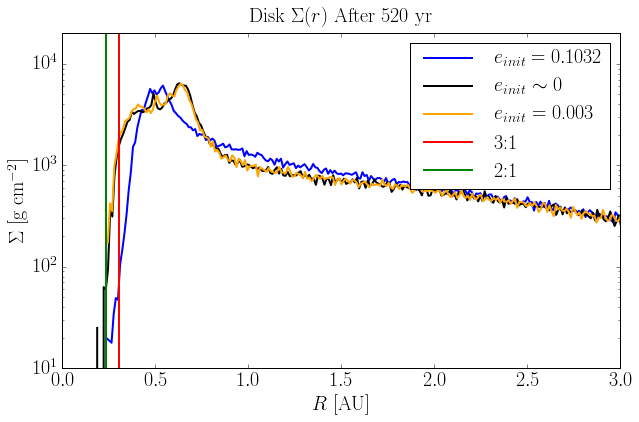

In [34]:
plt.plot(r_control_long,sigma_control_long,color='blue',linewidth=2,label=r"$e_{init} = 0.1032$")
plt.plot(r_lowEcc_long,sigma_lowEcc_long,color='black',linewidth=2,label=r"$e_{init}$ $\sim$ 0")
plt.plot(r_lowEccMean_long,sigma_lowEccMean_long,color='orange',linewidth=2,label=r'$e_{init}$ = 0.003')

plt.xlabel("$R$ [AU]")
plt.ylabel(r'$\Sigma$ [g cm$^{-2}$]')
plt.yscale('log')
plt.title(r'Disk $\Sigma(r)$ After 520 yr',y=1.02)
#plt.xscale('log') #confirm radius powerlaw relation
plt.xlim([0,3])
plt.ylim([10,20000])

#Plot lines of interest
loc = 2.08*0.1469
loc2 = AddBinary.pToA(2*18.8,1.2)
plt.axvline(x=loc, ymin=-1, ymax = 1, linewidth=2, color='red',label="3:1")
plt.axvline(x=loc2, ymin=-1, ymax = 1, linewidth=2, color='green',label="2:1")

plt.legend(loc='upper right')
#plt.savefig("24.09.2015.SigmaVsRAfter520yr.pdf")

# Plot disk eccentricity vs time with usual parameters [see .param file]) for low, mean, and control long (~520 yr) simulations corresponding to $e_{initial}$ = ~0, 0.003, and 0.1032, respectively.  This allows me to see how disk eccentricities vary given differining initial binary eccentricities.

In [7]:
time_control_long = [   0.        ,    2.18838047,    4.37676094,    6.5651414 ,
          8.75352187,   10.94190234,   13.13028281,   15.31866327,
         17.50704374,   19.69542421,   21.88380468,   24.07218514,
         26.26056561,   28.44894608,   30.63732655,   32.82570701,
         35.01408748,   37.20246795,   39.39084842,   41.57922888,
         43.76760935,   45.95598982,   48.14437029,   50.33275075,
         52.52113122,   54.70951169,   56.89789216,   59.08627262,
         61.27465309,   63.46303356,   65.65141403,   67.83979449,
         70.02817496,   72.21655543,   74.4049359 ,   76.59331636,
         78.78169683,   80.9700773 ,   83.15845777,   85.34683823,
         87.5352187 ,   89.72359917,   91.91197964,   94.1003601 ,
         96.28874057,   98.47712104,  100.66550151,  102.85388197,
        105.04226244,  107.23064291,  109.41902338,  111.60740384,
        113.79578431,  115.98416478,  118.17254525,  120.36092571,
        122.54930618,  124.73768665,  126.92606712,  129.11444758,
        131.30282805,  133.49120852,  135.67958899,  137.86796945,
        140.05634992,  142.24473039,  144.43311086,  146.62149132,
        148.80987179,  150.99825226,  153.18663273,  155.37501319,
        157.56339366,  159.75177413,  161.9401546 ,  164.12853506,
        166.31691553,  168.505296  ,  170.69367647,  172.88205693,
        175.0704374 ,  177.25881787,  179.44719834,  181.6355788 ,
        183.82395927,  186.01233974,  188.20072021,  190.38910067,
        192.57748114,  194.76586161,  196.95424208,  199.14262254,
        201.33100301,  203.51938348,  205.70776395,  207.89614441,
        210.08452488,  212.27290535,  214.46128582,  216.64966628,
        218.83804675,  221.02642722,  223.21480769,  225.40318815,
        227.59156862,  229.77994909,  231.96832956,  234.15671002,
        236.34509049,  238.53347096,  240.72185143,  242.91023189,
        245.09861236,  247.28699283,  249.4753733 ,  251.66375376,
        253.85213423,  256.0405147 ,  258.22889517,  260.41727563,
        262.6056561 ,  264.79403657,  266.98241704,  269.1707975 ,
        271.35917797,  273.54755844,  275.73593891,  277.92431937,
        280.11269984,  282.30108031,  284.48946078,  286.67784124,
        288.86622171,  291.05460218,  293.24298265,  295.43136311,
        297.61974358,  299.80812405,  301.99650452,  304.18488498,
        306.37326545,  308.56164592,  310.75002639,  312.93840685,
        315.12678732,  317.31516779,  319.50354826,  321.69192872,
        323.88030919,  326.06868966,  328.25707013,  330.44545059,
        332.63383106,  334.82221153,  337.010592  ,  339.19897246,
        341.38735293,  343.5757334 ,  345.76411387,  347.95249433,
        350.1408748 ,  352.32925527,  354.51763574,  356.7060162 ,
        358.89439667,  361.08277714,  363.27115761,  365.45953807,
        367.64791854,  369.83629901,  372.02467948,  374.21305994,
        376.40144041,  378.58982088,  380.77820135,  382.96658181,
        385.15496228,  387.34334275,  389.53172322,  391.72010368,
        393.90848415,  396.09686462,  398.28524509,  400.47362555,
        402.66200602,  404.85038649,  407.03876696,  409.22714743,
        411.41552789,  413.60390836,  415.79228883,  417.9806693 ,
        420.16904976,  422.35743023,  424.5458107 ,  426.73419117,
        428.92257163,  431.1109521 ,  433.29933257,  435.48771304,
        437.6760935 ,  439.86447397,  442.05285444,  444.24123491,
        446.42961537,  448.61799584,  450.80637631,  452.99475678,
        455.18313724,  457.37151771,  459.55989818,  461.74827865,
        463.93665911,  466.12503958,  468.31342005,  470.50180052,
        472.69018098,  474.87856145,  477.06694192,  479.25532239,
        481.44370285,  483.63208332,  485.82046379,  488.00884426,
        490.19722472,  492.38560519,  494.57398566,  496.76236613,
        498.95074659,  501.13912706,  503.32750753,  505.515888  ,
        507.70426846,  509.89264893,  512.0810294 ,  514.26940987,
        516.45779033,  518.6461708 ,  520.83455127]

time_lowEcc_long = [   0.        ,    2.18838047,    4.37676094,    6.5651414 ,
          8.75352187,   10.94190234,   13.13028281,   15.31866327,
         17.50704374,   19.69542421,   21.88380468,   24.07218514,
         26.26056561,   28.44894608,   30.63732655,   32.82570701,
         35.01408748,   37.20246795,   39.39084842,   41.57922888,
         43.76760935,   45.95598982,   48.14437029,   50.33275075,
         52.52113122,   54.70951169,   56.89789216,   59.08627262,
         61.27465309,   63.46303356,   65.65141403,   67.83979449,
         70.02817496,   72.21655543,   74.4049359 ,   76.59331636,
         78.78169683,   80.9700773 ,   83.15845777,   85.34683823,
         87.5352187 ,   89.72359917,   91.91197964,   94.1003601 ,
         96.28874057,   98.47712104,  100.66550151,  102.85388197,
        105.04226244,  107.23064291,  109.41902338,  111.60740384,
        113.79578431,  115.98416478,  118.17254525,  120.36092571,
        122.54930618,  124.73768665,  126.92606712,  129.11444758,
        131.30282805,  133.49120852,  135.67958899,  137.86796945,
        140.05634992,  142.24473039,  144.43311086,  146.62149132,
        148.80987179,  150.99825226,  153.18663273,  155.37501319,
        157.56339366,  159.75177413,  161.9401546 ,  164.12853506,
        166.31691553,  168.505296  ,  170.69367647,  172.88205693,
        175.0704374 ,  177.25881787,  179.44719834,  181.6355788 ,
        183.82395927,  186.01233974,  188.20072021,  190.38910067,
        192.57748114,  194.76586161,  196.95424208,  199.14262254,
        201.33100301,  203.51938348,  205.70776395,  207.89614441,
        210.08452488,  212.27290535,  214.46128582,  216.64966628,
        218.83804675,  221.02642722,  223.21480769,  225.40318815,
        227.59156862,  229.77994909,  231.96832956,  234.15671002,
        236.34509049,  238.53347096,  240.72185143,  242.91023189,
        245.09861236,  247.28699283,  249.4753733 ,  251.66375376,
        253.85213423,  256.0405147 ,  258.22889517,  260.41727563,
        262.6056561 ,  264.79403657,  266.98241704,  269.1707975 ,
        271.35917797,  273.54755844,  275.73593891,  277.92431937,
        280.11269984,  282.30108031,  284.48946078,  286.67784124,
        288.86622171,  291.05460218,  293.24298265,  295.43136311,
        297.61974358,  299.80812405,  301.99650452,  304.18488498,
        306.37326545,  308.56164592,  310.75002639,  312.93840685,
        315.12678732,  317.31516779,  319.50354826,  321.69192872,
        323.88030919,  326.06868966,  328.25707013,  330.44545059,
        332.63383106,  334.82221153,  337.010592  ,  339.19897246,
        341.38735293,  343.5757334 ,  345.76411387,  347.95249433,
        350.1408748 ,  352.32925527,  354.51763574,  356.7060162 ,
        358.89439667,  361.08277714,  363.27115761,  365.45953807,
        367.64791854,  369.83629901,  372.02467948,  374.21305994,
        376.40144041,  378.58982088,  380.77820135,  382.96658181,
        385.15496228,  387.34334275,  389.53172322,  391.72010368,
        393.90848415,  396.09686462,  398.28524509,  400.47362555,
        402.66200602,  404.85038649,  407.03876696,  409.22714743,
        411.41552789,  413.60390836,  415.79228883,  417.9806693 ,
        420.16904976,  422.35743023,  424.5458107 ,  426.73419117,
        428.92257163,  431.1109521 ,  433.29933257,  435.48771304,
        437.6760935 ,  439.86447397,  442.05285444,  444.24123491,
        446.42961537,  448.61799584,  450.80637631,  452.99475678,
        455.18313724,  457.37151771,  459.55989818,  461.74827865,
        463.93665911,  466.12503958,  468.31342005,  470.50180052,
        472.69018098,  474.87856145,  477.06694192,  479.25532239,
        481.44370285,  483.63208332,  485.82046379,  488.00884426,
        490.19722472,  492.38560519,  494.57398566,  496.76236613,
        498.95074659,  501.13912706,  503.32750753,  505.515888  ,
        507.70426846,  509.89264893,  512.0810294 ,  514.26940987,
        516.45779033,  518.6461708 ,  520.83455127]

time_meanEcc_long = [   0.        ,    2.18838047,    4.37676094,    6.5651414 ,
          8.75352187,   10.94190234,   13.13028281,   15.31866327,
         17.50704374,   19.69542421,   21.88380468,   24.07218514,
         26.26056561,   28.44894608,   30.63732655,   32.82570701,
         35.01408748,   37.20246795,   39.39084842,   41.57922888,
         43.76760935,   45.95598982,   48.14437029,   50.33275075,
         52.52113122,   54.70951169,   56.89789216,   59.08627262,
         61.27465309,   63.46303356,   65.65141403,   67.83979449,
         70.02817496,   72.21655543,   74.4049359 ,   76.59331636,
         78.78169683,   80.9700773 ,   83.15845777,   85.34683823,
         87.5352187 ,   89.72359917,   91.91197964,   94.1003601 ,
         96.28874057,   98.47712104,  100.66550151,  102.85388197,
        105.04226244,  107.23064291,  109.41902338,  111.60740384,
        113.79578431,  115.98416478,  118.17254525,  120.36092571,
        122.54930618,  124.73768665,  126.92606712,  129.11444758,
        131.30282805,  133.49120852,  135.67958899,  137.86796945,
        140.05634992,  142.24473039,  144.43311086,  146.62149132,
        148.80987179,  150.99825226,  153.18663273,  155.37501319,
        157.56339366,  159.75177413,  161.9401546 ,  164.12853506,
        166.31691553,  168.505296  ,  170.69367647,  172.88205693,
        175.0704374 ,  177.25881787,  179.44719834,  181.6355788 ,
        183.82395927,  186.01233974,  188.20072021,  190.38910067,
        192.57748114,  194.76586161,  196.95424208,  199.14262254,
        201.33100301,  203.51938348,  205.70776395,  207.89614441,
        210.08452488,  212.27290535,  214.46128582,  216.64966628,
        218.83804675,  221.02642722,  223.21480769,  225.40318815,
        227.59156862,  229.77994909,  231.96832956,  234.15671002,
        236.34509049,  238.53347096,  240.72185143,  242.91023189,
        245.09861236,  247.28699283,  249.4753733 ,  251.66375376,
        253.85213423,  256.0405147 ,  258.22889517,  260.41727563,
        262.6056561 ,  264.79403657,  266.98241704,  269.1707975 ,
        271.35917797,  273.54755844,  275.73593891,  277.92431937,
        280.11269984,  282.30108031,  284.48946078,  286.67784124,
        288.86622171,  291.05460218,  293.24298265,  295.43136311,
        297.61974358,  299.80812405,  301.99650452,  304.18488498,
        306.37326545,  308.56164592,  310.75002639,  312.93840685,
        315.12678732,  317.31516779,  319.50354826,  321.69192872,
        323.88030919,  326.06868966,  328.25707013,  330.44545059,
        332.63383106,  334.82221153,  337.010592  ,  339.19897246,
        341.38735293,  343.5757334 ,  345.76411387,  347.95249433,
        350.1408748 ,  352.32925527,  354.51763574,  356.7060162 ,
        358.89439667,  361.08277714,  363.27115761,  365.45953807,
        367.64791854,  369.83629901,  372.02467948,  374.21305994,
        376.40144041,  378.58982088,  380.77820135,  382.96658181,
        385.15496228,  387.34334275,  389.53172322,  391.72010368,
        393.90848415,  396.09686462,  398.28524509,  400.47362555,
        402.66200602,  404.85038649,  407.03876696,  409.22714743,
        411.41552789,  413.60390836,  415.79228883,  417.9806693 ,
        420.16904976,  422.35743023,  424.5458107 ,  426.73419117,
        428.92257163,  431.1109521 ,  433.29933257,  435.48771304,
        437.6760935 ,  439.86447397,  442.05285444,  444.24123491,
        446.42961537,  448.61799584,  450.80637631,  452.99475678,
        455.18313724,  457.37151771,  459.55989818,  461.74827865,
        463.93665911,  466.12503958,  468.31342005,  470.50180052,
        472.69018098,  474.87856145,  477.06694192,  479.25532239,
        481.44370285,  483.63208332,  485.82046379,  488.00884426,
        490.19722472,  492.38560519,  494.57398566,  496.76236613,
        498.95074659,  501.13912706,  503.32750753,  505.515888  ,
        507.70426846,  509.89264893,  512.0810294 ,  514.26940987,
        516.45779033,  518.6461708 ,  520.83455127]

In [8]:
diskEcc_control_long = [ 0.00576629,  0.02817296,  0.02727077,  0.02602422,  0.02576809,
        0.02698288,  0.0266266 ,  0.02621536,  0.02716231,  0.0275334 ,
        0.02663112,  0.02729584,  0.02772386,  0.02733596,  0.02732534,
        0.02802894,  0.0280099 ,  0.02697802,  0.02805056,  0.02802478,
        0.02744613,  0.02830503,  0.0283089 ,  0.02774816,  0.02841845,
        0.02836348,  0.02786952,  0.02857507,  0.02903977,  0.02838216,
        0.02826695,  0.02954967,  0.02965241,  0.02813696,  0.02898904,
        0.03034366,  0.03009755,  0.0282944 ,  0.03003367,  0.03138944,
        0.0310243 ,  0.02878825,  0.03021268,  0.03232476,  0.03203506,
        0.02973908,  0.02996795,  0.03266777,  0.03323981,  0.03177591,
        0.02969347,  0.03167408,  0.03367363,  0.03332311,  0.03084939,
        0.03023246,  0.03306932,  0.03425319,  0.03271608,  0.03031367,
        0.03179426,  0.03410476,  0.03458736,  0.03222681,  0.030644  ,
        0.0327682 ,  0.03516709,  0.03479769,  0.03227077,  0.03059138,
        0.03351744,  0.03623764,  0.03690962,  0.03415411,  0.03160256,
        0.03313415,  0.03608632,  0.03748121,  0.03577608,  0.03225327,
        0.03171651,  0.03526587,  0.03687069,  0.03578975,  0.03284687,
        0.03179565,  0.03466256,  0.03719446,  0.0366548 ,  0.03400677,
        0.03153881,  0.03358811,  0.03711796,  0.03803458,  0.03559843,
        0.03224057,  0.0333249 ,  0.03721045,  0.03989569,  0.03863276,
        0.03499488,  0.03235629,  0.03574178,  0.03981423,  0.04172005,
        0.04024127,  0.03592204,  0.03334874,  0.03622649,  0.03957085,
        0.04133733,  0.04025143,  0.03621428,  0.03334189,  0.03557367,
        0.03916986,  0.04172388,  0.04070893,  0.03734275,  0.03427225,
        0.03632659,  0.04123999,  0.0440823 ,  0.04424367,  0.04123531,
        0.03702529,  0.03577916,  0.03966466,  0.04276161,  0.0444773 ,
        0.04353742,  0.03990762,  0.03586387,  0.03586375,  0.04003268,
        0.0437098 ,  0.04523502,  0.04353352,  0.03940546,  0.03580758,
        0.03787683,  0.04261669,  0.04652068,  0.04815832,  0.04631597,
        0.04219375,  0.03834374,  0.03845346,  0.04203616,  0.04554914,
        0.04788141,  0.04748306,  0.04447322,  0.0403512 ,  0.03738943,
        0.03941487,  0.04329614,  0.04694314,  0.0486907 ,  0.04740705,
        0.04385858,  0.03911536,  0.03848906,  0.04177786,  0.04599915,
        0.04881287,  0.04961574,  0.04747919,  0.04295846,  0.03920916,
        0.03939196,  0.04354321,  0.0481701 ,  0.05126088,  0.05098277,
        0.04850326,  0.04429302,  0.04052054,  0.03980296,  0.04338787,
        0.04781573,  0.05051448,  0.05087594,  0.04888364,  0.0451034 ,
        0.0419096 ,  0.04074725,  0.0440231 ,  0.04880569,  0.05217487,
        0.05326702,  0.0519286 ,  0.04815624,  0.04318519,  0.04017474,
        0.04151335,  0.04558327,  0.04983306,  0.05245884,  0.05276339,
        0.05070128,  0.04700902,  0.04280243,  0.0411358 ,  0.04436202,
        0.04903829,  0.05315669,  0.0553786 ,  0.0550938 ,  0.05250833,
        0.04841494,  0.04395396,  0.04236792,  0.04550049,  0.04971473,
        0.05317222,  0.05484234,  0.05381582,  0.0501213 ,  0.04559545,
        0.04250404,  0.04207463,  0.04502553,  0.0495448 ,  0.05319146,
        0.05564512,  0.0547484 ,  0.05149939,  0.04702288,  0.04336345,
        0.04277897,  0.04589272,  0.05077083,  0.05459709,  0.05682158,
        0.05638393,  0.05315058,  0.04871749,  0.04513757]

diskEcc_lowEcc_long = [ 0.00571989,  0.02746057,  0.03274917,  0.03600258,  0.03789915,
        0.03876497,  0.03960403,  0.04034729,  0.04102842,  0.04129258,
        0.04165356,  0.04177094,  0.04249625,  0.04272595,  0.04296686,
        0.04276995,  0.04294895,  0.04307731,  0.04342351,  0.04376396,
        0.04437506,  0.04508062,  0.045277  ,  0.0455179 ,  0.0457698 ,
        0.04573858,  0.04637503,  0.04672997,  0.04724257,  0.0475633 ,
        0.04817689,  0.0484027 ,  0.04880283,  0.0491263 ,  0.04920918,
        0.04933218,  0.04976964,  0.05021755,  0.05050144,  0.05051745,
        0.0509665 ,  0.05136856,  0.05160433,  0.05200944,  0.05227212,
        0.05267719,  0.05290612,  0.05322684,  0.05344847,  0.05384854,
        0.05366887,  0.05384471,  0.05409162,  0.05384191,  0.05407925,
        0.05434152,  0.05480921,  0.05530275,  0.05618931,  0.05618616,
        0.05632002,  0.05644401,  0.05654235,  0.05690771,  0.05773707,
        0.05803758,  0.05807159,  0.05862412,  0.05861203,  0.05902718,
        0.05896316,  0.05896625,  0.05925103,  0.05901124,  0.05989093,
        0.06039858,  0.06083336,  0.06090777,  0.06112233,  0.06166653,
        0.0617269 ,  0.06211925,  0.06257252,  0.06265631,  0.06275309,
        0.06305734,  0.06343228,  0.06387889,  0.06454925,  0.06465331,
        0.0650716 ,  0.06582661,  0.06588563,  0.0661443 ,  0.06619852,
        0.06626214,  0.06611396,  0.06629074,  0.06618204,  0.06633497,
        0.06646335,  0.06661326,  0.06726408,  0.0674075 ,  0.0675572 ,
        0.06772688,  0.06740904,  0.06803998,  0.0684348 ,  0.06816739,
        0.06877325,  0.06913653,  0.06974833,  0.07030858,  0.07099325,
        0.07138277,  0.07210513,  0.07207769,  0.07227335,  0.07249365,
        0.07279519,  0.07331455,  0.07363089,  0.07349067,  0.074395  ,
        0.07494186,  0.07493776,  0.07486227,  0.07550625,  0.07547303,
        0.07568501,  0.07548401,  0.07574374,  0.07599425,  0.07647526,
        0.07676532,  0.07707053,  0.07805349,  0.07853118,  0.07890865,
        0.07966405,  0.079893  ,  0.08015983,  0.08039972,  0.08050689,
        0.08065061,  0.08080824,  0.08127786,  0.08184476,  0.08208557,
        0.08212247,  0.08237061,  0.08259519,  0.08308395,  0.08338927,
        0.08410414,  0.08437314,  0.08525767,  0.08558188,  0.08609238,
        0.08699029,  0.08711913,  0.0869058 ,  0.08717686,  0.08712769,
        0.08697298,  0.08708403,  0.08713436,  0.08735458,  0.0873932 ,
        0.08773157,  0.08772423,  0.08781318,  0.08824438,  0.08845894,
        0.08903744,  0.08942715,  0.09012618,  0.090174  ,  0.0909492 ,
        0.09082534,  0.09106123,  0.09128949,  0.09131906,  0.09190081,
        0.09191361,  0.09258269,  0.09249651,  0.09260601,  0.09225994,
        0.09319174,  0.0934333 ,  0.09347081,  0.09371279,  0.09409655,
        0.09409695,  0.09440107,  0.0948143 ,  0.09497861,  0.09507059,
        0.09568029,  0.09574942,  0.09623427,  0.09643761,  0.09650519,
        0.09707846,  0.09707817,  0.09724406,  0.09726214,  0.09754636,
        0.09735017,  0.09797679,  0.09827125,  0.09854496,  0.09898721,
        0.09916468,  0.0991662 ,  0.09946262,  0.10007707,  0.10048579,
        0.10019043,  0.10062721,  0.10073499,  0.10077503,  0.10072   ,
        0.10105562,  0.1015069 ,  0.10148121,  0.10162594,  0.10157035,
        0.10112886,  0.10191989,  0.1024266 ,  0.10302065,  0.10322382,
        0.10418128,  0.10414725,  0.10430034,  0.10475954]

diskEcc_meanEcc_long = [ 0.0057933 ,  0.028935  ,  0.03343844,  0.03659246,  0.03828109,
        0.03912411,  0.03940773,  0.03975369,  0.03996562,  0.04014981,
        0.0403995 ,  0.04091661,  0.04143605,  0.04173489,  0.04163296,
        0.04248817,  0.04260228,  0.04277508,  0.04309092,  0.04382483,
        0.04397393,  0.04451835,  0.04527351,  0.04543485,  0.04595216,
        0.04632121,  0.0466918 ,  0.04698485,  0.04751735,  0.04762882,
        0.04783548,  0.04789075,  0.04829865,  0.04799004,  0.048666  ,
        0.04883054,  0.04953701,  0.04970935,  0.0499096 ,  0.05030319,
        0.05087718,  0.05102941,  0.05137686,  0.05181879,  0.05224008,
        0.0523682 ,  0.05277818,  0.05280456,  0.05313055,  0.05327277,
        0.05384178,  0.05434323,  0.05512344,  0.05560195,  0.0554407 ,
        0.05548954,  0.05535264,  0.05578081,  0.05627661,  0.05634162,
        0.05620216,  0.05618669,  0.05640965,  0.05658983,  0.05695745,
        0.05740615,  0.05794139,  0.05798381,  0.05858901,  0.05847796,
        0.05866582,  0.05898154,  0.0595982 ,  0.06004259,  0.06055807,
        0.0612136 ,  0.06171019,  0.0618452 ,  0.06110316,  0.06158218,
        0.06132793,  0.06139439,  0.06145853,  0.06217011,  0.06270127,
        0.06315483,  0.06323103,  0.06330868,  0.06346207,  0.06387794,
        0.06434625,  0.06447553,  0.06509856,  0.06501917,  0.0652936 ,
        0.0649497 ,  0.06445507,  0.0652548 ,  0.06541844,  0.06581184,
        0.06658758,  0.06660723,  0.06703073,  0.06709592,  0.06708884,
        0.0674997 ,  0.06760805,  0.06865883,  0.06943484,  0.07024124,
        0.07031044,  0.06992769,  0.06990136,  0.0694579 ,  0.06976613,
        0.07010165,  0.07079361,  0.07144739,  0.07115396,  0.07140482,
        0.07136521,  0.07109195,  0.07099663,  0.07143699,  0.07217764,
        0.07291988,  0.07348538,  0.07372653,  0.07351252,  0.07342809,
        0.07314181,  0.07340549,  0.07431216,  0.0755475 ,  0.07613628,
        0.0762149 ,  0.07663661,  0.07625125,  0.0761604 ,  0.07583278,
        0.07606784,  0.07671036,  0.07799422,  0.07836916,  0.07875539,
        0.07927739,  0.07895534,  0.07922277,  0.07946561,  0.07995729,
        0.080764  ,  0.08137671,  0.08181997,  0.08240227,  0.08250464,
        0.08275557,  0.08312935,  0.08375671,  0.08459111,  0.08508882,
        0.08524437,  0.08518008,  0.08479548,  0.08465938,  0.08461173,
        0.08489484,  0.08486897,  0.08474785,  0.08502781,  0.08532447,
        0.08574456,  0.08550834,  0.08599702,  0.08591598,  0.08579376,
        0.08573504,  0.08598522,  0.08655449,  0.08705763,  0.08766953,
        0.08749499,  0.08711353,  0.08718447,  0.08709966,  0.08723924,
        0.08813086,  0.08859627,  0.0889985 ,  0.08972065,  0.09009382,
        0.09040492,  0.09031751,  0.09078623,  0.09039204,  0.09014924,
        0.09073592,  0.09114189,  0.09171748,  0.09240624,  0.09240774,
        0.09230727,  0.09232283,  0.09232933,  0.09312007,  0.09337366,
        0.09412761,  0.0942679 ,  0.09491898,  0.09502894,  0.09499112,
        0.09472043,  0.09448522,  0.09483787,  0.09375113,  0.09409699,
        0.09450544,  0.09545591,  0.09564006,  0.09547426,  0.09549666,
        0.09567248,  0.09613844,  0.09657685,  0.09704925,  0.09792351,
        0.09809841,  0.09878382,  0.09909278,  0.09950273,  0.09889447,
        0.09877841,  0.09887697,  0.0994167 ,  0.09960944,  0.09978726,
        0.09995564,  0.10077279,  0.10111753,  0.10081152]

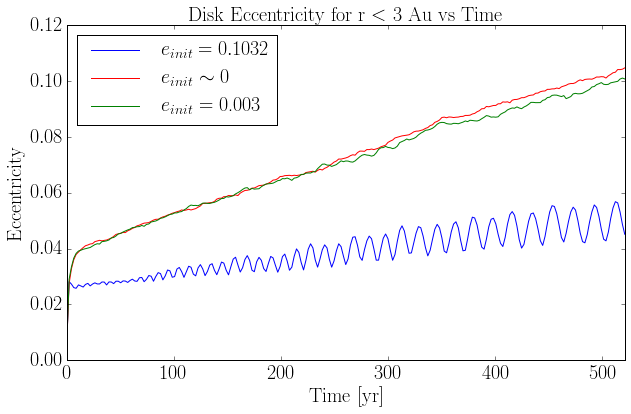

In [20]:
plt.plot(time_control_long,diskEcc_control_long,color='blue',label=r'$e_{init}=0.1032$')
plt.plot(time_lowEcc_long,diskEcc_lowEcc_long,color='red',label=r'$e_{init}$ $\sim0$')
plt.plot(time_meanEcc_long,diskEcc_meanEcc_long,color='green',label=r'$e_{init}$ = 0.003')

plt.xlabel('Time [yr]')
plt.ylabel('Eccentricity')
plt.title(r"Disk Eccentricity for r $<$ 3 Au vs Time")
plt.xlim(time_control_long[0],time_control_long[-1])

plt.legend(loc='upper left')
#plt.savefig("09.23.2015.diskEccVsTime.pdf")

# Plot binary eccentricity (scaled so that they all start at e = 0.1032) vs time with usual parameters [see .param file]) for low, mean, and control long (~520 yr) simulations corresponding to $e_{initial}$ = ~0, 0.003, and 0.1032, respectively.  This allows me to see how de/dt varies given the different initial eccentricities.

In [22]:
binEcc_control_long = [ 0.10324994,  0.10456675,  0.10579667,  0.10648618,  0.10800922,
        0.10919078,  0.1102418 ,  0.11111188,  0.11247313,  0.11310767,
        0.11433404,  0.11524089,  0.11618899,  0.11633311,  0.11790925,
        0.11850551,  0.11909518,  0.12028451,  0.12107948,  0.12226715,
        0.12275131,  0.12394249,  0.124927  ,  0.12563821,  0.12636383,
        0.1270207 ,  0.12724311,  0.12846517,  0.12947051,  0.12959996,
        0.13049805,  0.13129992,  0.13148734,  0.13215926,  0.13344962,
        0.13355779,  0.13364433,  0.1346807 ,  0.13550389,  0.13586797,
        0.13634569,  0.13724369,  0.13782881,  0.13813615,  0.13862772,
        0.13935059,  0.14026817,  0.1408715 ,  0.14077815,  0.14130141,
        0.1419903 ,  0.14262468,  0.14309673,  0.1433779 ,  0.1438213 ,
        0.14464802,  0.14535246,  0.14567992,  0.14592056,  0.14630161,
        0.14691913,  0.14761945,  0.14814142,  0.1482838 ,  0.14870591,
        0.14932738,  0.1498018 ,  0.15026869,  0.15121632,  0.15170949,
        0.15207325,  0.15232426,  0.15245887,  0.15267649,  0.1530476 ,
        0.15368499,  0.15424096,  0.15454977,  0.15465725,  0.15470522,
        0.1548833 ,  0.15509449,  0.15552143,  0.15579632,  0.15621024,
        0.15680287,  0.15734822,  0.15766951,  0.15789489,  0.15814572,
        0.15848744,  0.15892857,  0.15913701,  0.15949233,  0.16023261,
        0.16062101,  0.1611254 ,  0.16169696,  0.16271549,  0.16314415,
        0.16358621,  0.16401593,  0.16438842,  0.16465821,  0.16465647,
        0.16493886,  0.16494247,  0.16540827,  0.16586884,  0.16621417,
        0.16650704,  0.16685845,  0.16703603,  0.16728505,  0.16792091,
        0.16824444,  0.16837521,  0.16850447,  0.16871633,  0.16905958,
        0.16938963,  0.16965214,  0.17025508,  0.17016177,  0.17054907,
        0.17097788,  0.17132015,  0.17165498,  0.17181175,  0.17179156,
        0.17220045,  0.17253155,  0.17297092,  0.17341067,  0.1736416 ,
        0.17396586,  0.17423312,  0.17472415,  0.1749793 ,  0.17515816,
        0.17575401,  0.17610685,  0.1761628 ,  0.17625509,  0.17685337,
        0.17698914,  0.17714911,  0.17736213,  0.17748268,  0.17765662,
        0.1778421 ,  0.17777176,  0.17786966,  0.1779086 ,  0.17813898,
        0.17843512,  0.17859504,  0.17878742,  0.17888353,  0.1794021 ,
        0.17955253,  0.17956548,  0.17983878,  0.1803071 ,  0.1806502 ,
        0.18079563,  0.18106805,  0.18121393,  0.18157834,  0.18186048,
        0.18219322,  0.18241578,  0.18251447,  0.18264986,  0.18260701,
        0.18281179,  0.18300242,  0.18311692,  0.18313862,  0.18329542,
        0.18357505,  0.18353721,  0.18369577,  0.18382823,  0.18418147,
        0.1844492 ,  0.18484261,  0.18505108,  0.18538115,  0.18579039,
        0.18612929,  0.18627356,  0.18636986,  0.18668055,  0.18688699,
        0.1870931 ,  0.18734555,  0.18747287,  0.18751527,  0.18755965,
        0.18765097,  0.18775467,  0.1879168 ,  0.18811181,  0.18829362,
        0.18831248,  0.1883408 ,  0.18852185,  0.18895014,  0.18890606,
        0.18895592,  0.18916673,  0.18952682,  0.18969612,  0.1899773 ,
        0.18992512,  0.19016251,  0.19007314,  0.19037088,  0.19057501,
        0.19077158,  0.19092491,  0.19104793,  0.1913277 ,  0.19138196,
        0.19153592,  0.19175734,  0.19221451,  0.19231207,  0.19244801,
        0.19270511,  0.19281666,  0.19289315,  0.19299978,  0.19291112,
        0.19289142,  0.19293268,  0.19310667,  0.19324705]

binEcc_lowEcc_long = np.asarray([  4.52803861e-05,   1.06330718e-03,   2.04580103e-03,
         2.26516751e-03,   9.21525879e-04,   7.06613930e-04,
         2.15712379e-03,   2.72395388e-03,   3.59539701e-03,
         2.83795535e-03,   1.91157199e-03,   3.95529915e-04,
         9.44332703e-04,   2.59650268e-03,   3.10606857e-03,
         3.11950579e-03,   2.44191424e-03,   1.08394839e-03,
         5.03876006e-04,   1.89067157e-03,   2.52411518e-03,
         3.03605727e-03,   2.75325908e-03,   1.84152603e-03,
         8.39190325e-04,   1.47600153e-03,   2.03371674e-03,
         3.11386699e-03,   3.21113108e-03,   2.66017246e-03,
         1.95919290e-03,   1.07447373e-03,   1.99891690e-03,
         2.74143128e-03,   3.88352959e-03,   3.51502441e-03,
         3.18050242e-03,   2.49562276e-03,   1.07304712e-03,
         1.57232095e-03,   2.42276533e-03,   3.34638161e-03,
         3.61100610e-03,   3.30128294e-03,   2.90958941e-03,
         1.92308803e-03,   1.62234441e-03,   2.22675531e-03,
         3.55172418e-03,   4.34306773e-03,   3.91614957e-03,
         2.90897506e-03,   2.30339349e-03,   1.98903227e-03,
         2.36243515e-03,   3.16021857e-03,   3.79480394e-03,
         4.36774807e-03,   3.84064527e-03,   2.71935942e-03,
         1.64136393e-03,   1.42840301e-03,   2.67920309e-03,
         3.63518294e-03,   3.90701086e-03,   3.44576751e-03,
         2.84889766e-03,   2.09598311e-03,   1.33041486e-03,
         1.61846603e-03,   2.48235883e-03,   2.98335872e-03,
         3.31864355e-03,   3.39797656e-03,   3.00034914e-03,
         1.97248814e-03,   1.23267387e-03,   1.34257678e-03,
         2.15015912e-03,   3.12705112e-03,   3.53535879e-03,
         3.63530255e-03,   3.19410715e-03,   2.18061314e-03,
         1.47784280e-03,   1.49959965e-03,   2.50012149e-03,
         3.29048222e-03,   3.82014104e-03,   3.82796702e-03,
         3.41530003e-03,   2.67030974e-03,   2.06358386e-03,
         1.91491449e-03,   2.56300176e-03,   3.49405566e-03,
         3.66038226e-03,   3.65628969e-03,   3.19662542e-03,
         2.48892780e-03,   1.42127244e-03,   1.21852677e-03,
         1.61009232e-03,   2.46613393e-03,   3.10588557e-03,
         3.40150013e-03,   3.01972468e-03,   2.80540010e-03,
         1.97431790e-03,   1.37725941e-03,   1.59229565e-03,
         2.29294173e-03,   3.00742303e-03,   3.29213016e-03,
         3.56982458e-03,   3.45835492e-03,   2.85602892e-03,
         1.64229279e-03,   9.51512595e-04,   1.25536084e-03,
         1.70798532e-03,   2.14855639e-03,   2.38825334e-03,
         2.45014564e-03,   2.24852467e-03,   1.84168170e-03,
         1.05065315e-03,   1.75068142e-04,   7.20802091e-04,
         1.38402067e-03,   2.15257928e-03,   2.57584158e-03,
         2.69195563e-03,   2.30050265e-03,   1.94149824e-03,
         1.39563875e-03,   1.39303007e-03,   2.06469147e-03,
         2.62007600e-03,   2.99773949e-03,   3.22385682e-03,
         2.93231257e-03,   2.38049709e-03,   1.62920632e-03,
         1.05052365e-03,   1.05134046e-03,   1.64848292e-03,
         2.47582971e-03,   2.75768802e-03,   2.93308302e-03,
         2.73352983e-03,   2.01922500e-03,   1.48310781e-03,
         9.80807321e-04,   8.44560281e-04,   1.15704928e-03,
         1.85964724e-03,   2.56948070e-03,   2.88490989e-03,
         2.99684084e-03,   2.62269472e-03,   1.84729521e-03,
         8.29899745e-04,   8.62535562e-04,   1.62278614e-03,
         2.31935179e-03,   2.95033166e-03,   3.18300337e-03,
         3.12498669e-03,   3.11291869e-03,   2.54106102e-03,
         1.63354694e-03,   6.32806973e-04,   9.93875305e-04,
         1.55974064e-03,   2.01786066e-03,   2.22629318e-03,
         2.42868923e-03,   2.58757419e-03,   2.41948768e-03,
         1.81766039e-03,   1.00177565e-03,   4.21802561e-04,
         6.21735252e-04,   1.12709131e-03,   1.55111785e-03,
         2.26950525e-03,   2.55248229e-03,   2.40247820e-03,
         1.94865147e-03,   1.66682976e-03,   1.14648557e-03,
         2.76017309e-04,   9.93512185e-04,   1.43615586e-03,
         1.48669427e-03,   1.81861591e-03,   2.16417929e-03,
         2.06914443e-03,   1.46365160e-03,   1.03585262e-03,
         7.56634620e-04,   2.38802750e-04,   1.07099222e-03,
         1.58842514e-03,   1.79838365e-03,   2.47614931e-03,
         2.62713299e-03,   2.29902919e-03,   1.98342425e-03,
         1.82657352e-03,   9.44605541e-04,   1.16715946e-03,
         1.73697593e-03,   2.21341927e-03,   2.97163105e-03,
         2.95128394e-03,   2.81249664e-03,   2.99367070e-03,
         2.42249047e-03,   1.77705048e-03,   1.75546963e-03,
         1.24134075e-03,   2.09377054e-03,   2.42250269e-03,
         2.79112164e-03,   3.10285372e-03,   2.53535518e-03,
         2.56437590e-03,   2.10899271e-03,   1.59332666e-03,
         1.40902622e-03,   1.16839774e-03,   1.97667228e-03,
         2.12612514e-03,   2.72662727e-03,   2.63129079e-03,
         2.46029645e-03,   2.64043795e-03])

binEcc_meanEcc_long = np.asarray([ 0.00304539,  0.00218059,  0.00439424,  0.00489759,  0.00376908,
        0.00255257,  0.00297464,  0.00524617,  0.00579501,  0.00548952,
        0.00404057,  0.00253191,  0.00307929,  0.00466872,  0.00553588,
        0.00594292,  0.00458015,  0.00346126,  0.00279244,  0.00368265,
        0.0050895 ,  0.00536084,  0.00471501,  0.00413587,  0.00286046,
        0.00254844,  0.00425646,  0.00532657,  0.00581166,  0.006151  ,
        0.00483237,  0.00331325,  0.00389257,  0.00563424,  0.0062009 ,
        0.00668518,  0.00654217,  0.00525809,  0.00427171,  0.00463159,
        0.00568224,  0.00652873,  0.00702485,  0.00723551,  0.0062508 ,
        0.0051179 ,  0.00501616,  0.00565855,  0.00660309,  0.00711602,
        0.00760589,  0.00720915,  0.00600632,  0.00554249,  0.00562077,
        0.0064829 ,  0.00740605,  0.00765166,  0.00754089,  0.00724772,
        0.00656418,  0.00549188,  0.00529649,  0.00628333,  0.00779468,
        0.00842723,  0.00813338,  0.00707292,  0.00611058,  0.00591851,
        0.00622702,  0.00690497,  0.00759937,  0.00812725,  0.00801517,
        0.00739538,  0.00679127,  0.00640516,  0.00643773,  0.00690266,
        0.0077238 ,  0.00816687,  0.00828998,  0.00792991,  0.00730558,
        0.00679721,  0.00661546,  0.00710968,  0.00813505,  0.0088994 ,
        0.00892338,  0.00834072,  0.00766397,  0.00707476,  0.00713706,
        0.00760248,  0.00870415,  0.00928274,  0.00940311,  0.00885977,
        0.00828963,  0.00749378,  0.00731414,  0.00764936,  0.00843545,
        0.00919337,  0.00949786,  0.00955425,  0.0089884 ,  0.00813738,
        0.00788538,  0.00810677,  0.00885318,  0.00997915,  0.01049304,
        0.01054414,  0.01001294,  0.0095056 ,  0.00886488,  0.00874118,
        0.00896111,  0.00950073,  0.01021601,  0.01047915,  0.01045539,
        0.01000414,  0.00912964,  0.00850944,  0.00882152,  0.00909696,
        0.01012799,  0.01079935,  0.01097274,  0.01058062,  0.01022083,
        0.00987854,  0.00962794,  0.00996247,  0.01029945,  0.01094831,
        0.01143762,  0.01144145,  0.0108634 ,  0.01009143,  0.00957799,
        0.00963988,  0.00999205,  0.01084395,  0.01158776,  0.01201126,
        0.0119755 ,  0.01161241,  0.01110386,  0.01064973,  0.01071032,
        0.01115146,  0.01176416,  0.0125541 ,  0.01300045,  0.01312078,
        0.01293627,  0.01264709,  0.01219412,  0.01171036,  0.01160577,
        0.01201507,  0.01268896,  0.01355675,  0.01406349,  0.01366027,
        0.01298979,  0.01250105,  0.0122447 ,  0.01250996,  0.0127077 ,
        0.0131651 ,  0.01366735,  0.01435129,  0.0145402 ,  0.01396084,
        0.01322991,  0.01279731,  0.01263959,  0.01291194,  0.01334938,
        0.01415437,  0.01486819,  0.01482719,  0.01437964,  0.01404399,
        0.01367864,  0.01320073,  0.01297461,  0.01370094,  0.01448474,
        0.01480327,  0.01512755,  0.01524231,  0.01487466,  0.01435136,
        0.01409227,  0.01420611,  0.01410714,  0.01468647,  0.01566092,
        0.01600884,  0.01598267,  0.01607467,  0.0154884 ,  0.01483083,
        0.01495976,  0.01496531,  0.01498449,  0.01599404,  0.0165722 ,
        0.01658006,  0.01686846,  0.01645269,  0.01579303,  0.01560813,
        0.01526488,  0.01520607,  0.01596082,  0.01614471,  0.01668008,
        0.01676775,  0.01639105,  0.01633135,  0.01550253,  0.01511437,
        0.01528016,  0.01502583,  0.01620737,  0.01661676,  0.01706554,
        0.01750381,  0.0169338 ,  0.01703699,  0.01600743])

#Scale low, mean ecc array for plotting purposes
binEcc_lowEcc_long += binEcc_control_long[0] - binEcc_lowEcc_long[0]
binEcc_meanEcc_long += binEcc_control_long[0] - binEcc_meanEcc_long[0]


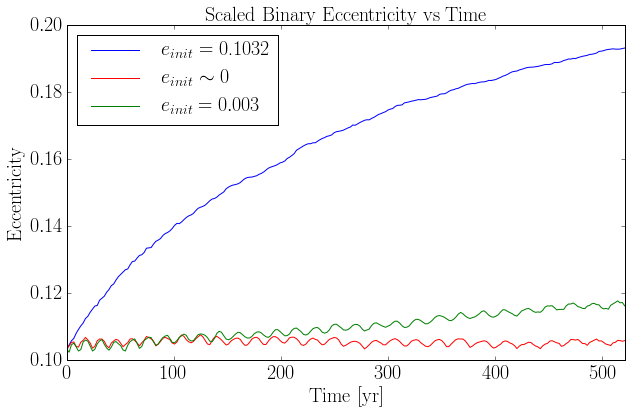

In [24]:
plt.plot(time_control_long,binEcc_control_long,color='blue',label='$e_{init}$ = 0.1032')
plt.plot(time_lowEcc_long,binEcc_lowEcc_long,color='red',label='$e_{init}$ $\sim 0$')
plt.plot(time_meanEcc_long,binEcc_meanEcc_long,color='green',label=r'$e_{init} = 0.003$')

plt.xlabel('Time [yr]')
plt.ylabel('Eccentricity')
plt.title(r"Scaled Binary Eccentricity vs Time")
plt.xlim(time_control_long[0],time_control_long[-1])

plt.legend(loc='upper left')
#plt.savefig("09.23.2015.binEccVsTime.pdf")